# Simple inverse distance weighted (IDW) interpolation with python
based on answer https://stackoverflow.com/a/3114117

Also several explanations on what numpy meshgrid does https://stackoverflow.com/questions/36013063/what-is-the-purpose-of-meshgrid-in-python-numpy

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Generate data

In [2]:
# number of "input" points
n = 10

# generate 10 arrays of random data
# will serve as x,y coordinates and value (z) of the point
x, y, z = map(np.random.random, [n, n, n])

In [3]:
# size of the grid to interpolate
nx, ny = 50, 50 

# generate two arrays of evenly space data between ends of previous arrays
xi = np.linspace(x.min(), x.max(), nx)
yi = np.linspace(y.min(), y.max(), ny)

# generate grid 
xi, yi = np.meshgrid(xi, yi)

# colapse grid into 1D
xi, yi = xi.flatten(), yi.flatten()

## Define functions needed

In [4]:
def distance_matrix(x0, y0, x1, y1):
    """ Make a distance matrix between pairwise observations.
    Note: from <http://stackoverflow.com/questions/1871536> 
    """
    
    obs = np.vstack((x0, y0)).T
    interp = np.vstack((x1, y1)).T

    d0 = np.subtract.outer(obs[:,0], interp[:,0])
    d1 = np.subtract.outer(obs[:,1], interp[:,1])
    
    # calculate hypotenuse
    return np.hypot(d0, d1)

In [5]:
def simple_idw(x, y, z, xi, yi, power=1):
    """ Simple inverse distance weighted (IDW) interpolation 
    Weights are proportional to the inverse of the distance, so as the distance
    increases, the weights decrease rapidly.
    The rate at which the weights decrease is dependent on the value of power.
    As power increases, the weights for distant points decrease rapidly.
    """
    
    dist = distance_matrix(x,y, xi,yi)

    # In IDW, weights are 1 / distance
    weights = 1.0/(dist+1e-12)**power

    # Make weights sum to one
    weights /= weights.sum(axis=0)

    # Multiply the weights for each interpolated point by all observed Z-values
    return np.dot(weights.T, z)

In [6]:
def plot(x,y,z,grid):
    """ Plot the input points and the result """
    plt.figure(figsize=(15,10))
    plt.imshow(grid, extent=(x.min(), x.max(), y.max(), y.min()), cmap='rainbow', interpolation='gaussian')
    plt.scatter(x,y,c=z, cmap='rainbow', edgecolors='black')
    plt.colorbar()

## Test IDW

### Power = 1

In [7]:
 # Calculate IDW
grid1 = simple_idw(x,y,z,xi,yi, power=1)
grid1 = grid1.reshape((ny, nx))

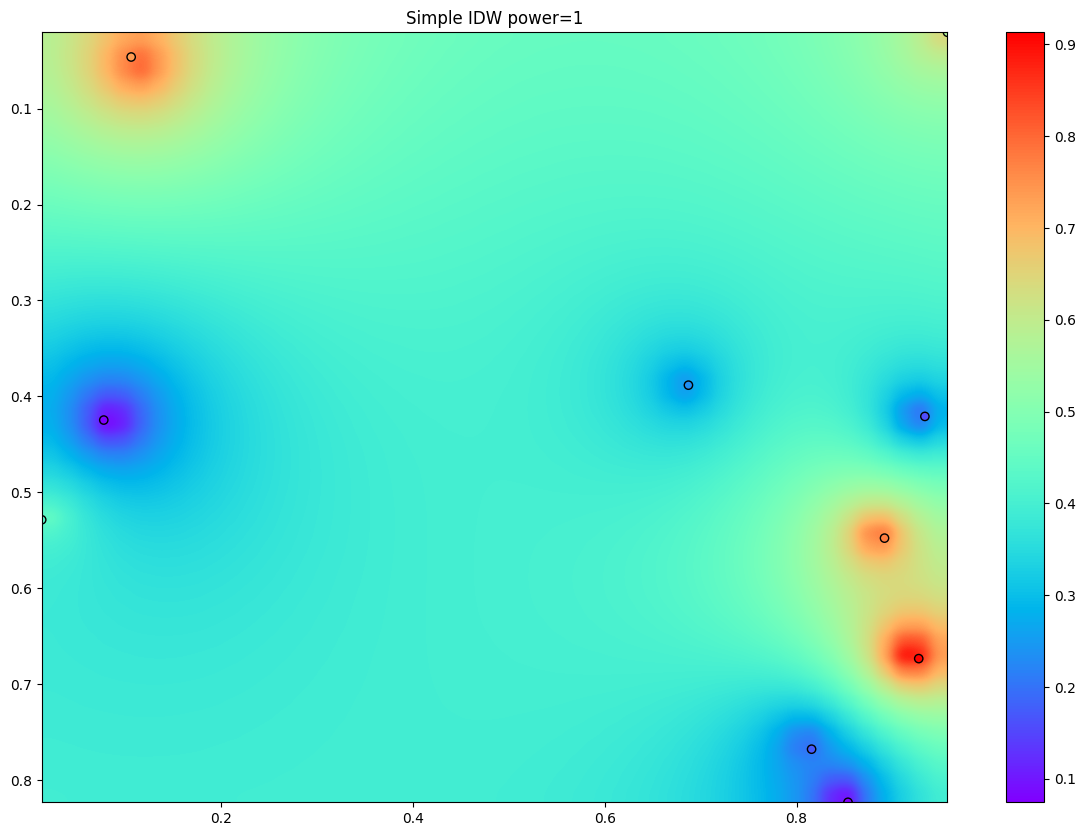

In [8]:
plot(x,y,z,grid1)
plt.title('Simple IDW power=1')
plt.show()

### Power = 2

In [9]:
 # Calculate IDW
grid1 = simple_idw(x,y,z,xi,yi, power=2)
grid1 = grid1.reshape((ny, nx))

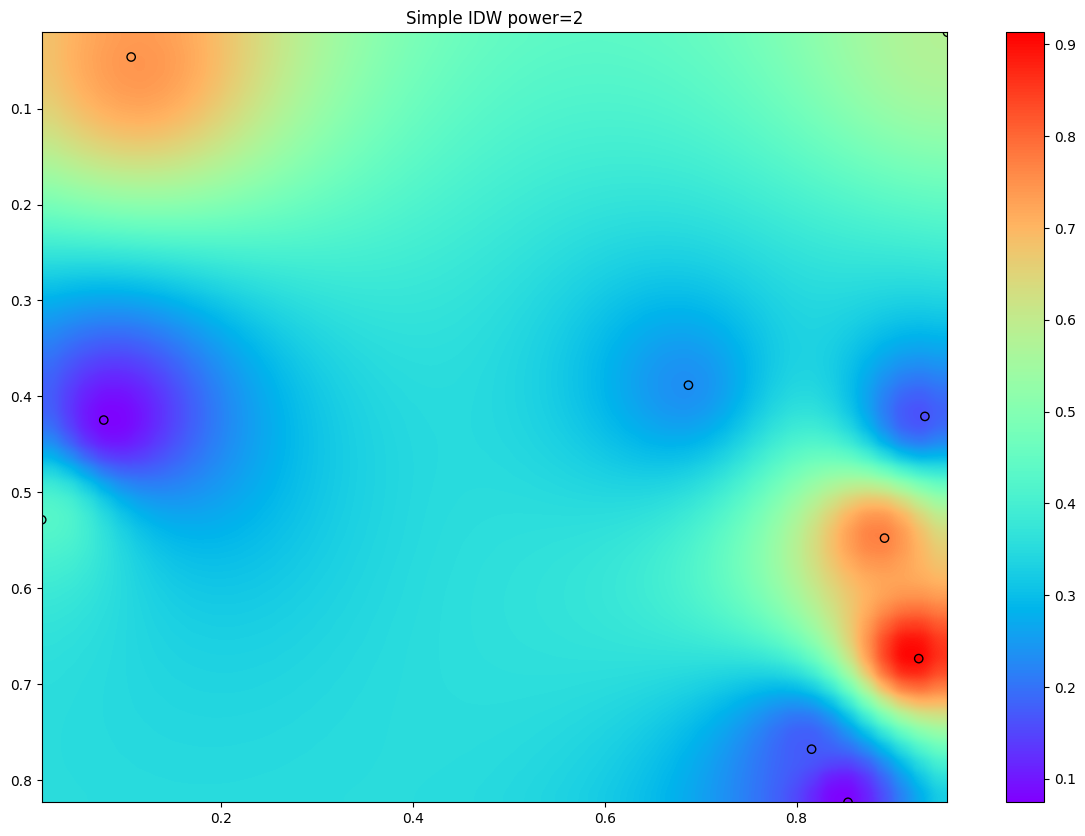

In [10]:
plot(x,y,z,grid1)
plt.title('Simple IDW power=2')
plt.show()